In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import random as rd
import numpy as np
from tensorflow.keras.models import load_model
import json
import matplotlib.pyplot as plt
import time
from scipy import stats, signal
from itertools import groupby
import glob
import tensorflow as tf
import matplotlib
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

GPU is available


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Datasets_thesis')
from sliding_window_evaluation import main as swe_main

In [ ]:
########### Load Model ###########
dir_model = r'/content/drive/MyDrive/Datasets_thesis/1DCNN_perSensor_bLSTM.h5'
#dir_model = r'/content/drive/MyDrive/Datasets_thesis/models_normalized/1DCNN_combined_bLSTM_normalized.h5'

model = load_model(dir_model)

normalize = False # Whether to normalize the signals to max absolute value 1

print('Model loaded')

Model loaded


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Recording loaded


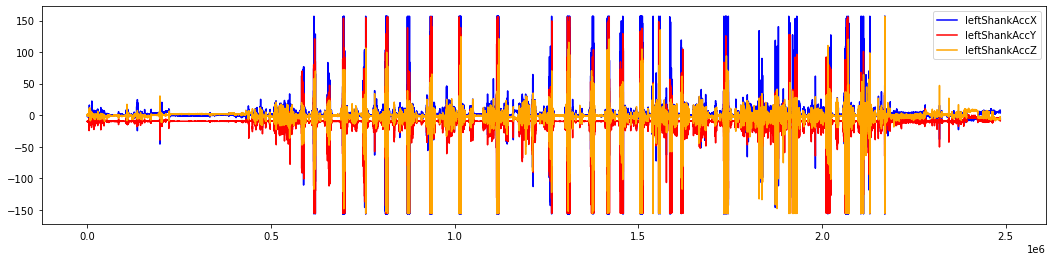

In [ ]:
############ Load recording ###############
# Files where the csv files with the recordings are
#files_dir = r'/content/drive/MyDrive/Datasets_thesis/rozemarijn_4.csv' # Rozemarijn's
files_dir = r'/content/drive/MyDrive/Datasets_thesis/new_wilmes.csv' # New Wilmes'

sampling_freq_original = 500 # Sampling freq of the recording

# Read recording
df = pd.read_csv(files_dir, index_col = 0)
df.reset_index(inplace = True)
print('Recording loaded')

true_label_name = None # True label of recording. Set to None if unknown

# Plot whole recording
fig, axes = plt.subplots(figsize=(18,4))
df.plot.line(ax = axes, y = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ'], color = ['blue', 'red', 'orange']);

    
# Choose another normalizing recording if wanted. If not, the whole recording is used
#df = pd.read_csv(random_file, index_col = 0) 

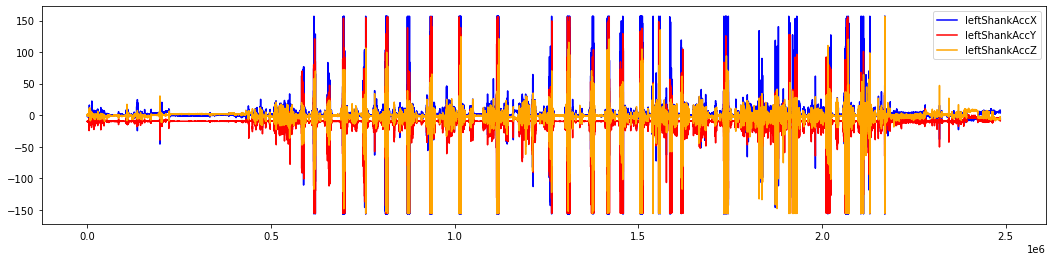

In [ ]:
# Plot part of recording and choose it
fig, axes = plt.subplots(figsize=(18,4))
recording = df.iloc[:,:] # Choose part of recording
recording.plot.line(ax = axes, y = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ'], color = ['blue', 'red', 'orange']);

In [ ]:
############### Parameters ###################
# Possible order of sensors (Do not touch!)
order_of_sensors_acc = ['leftShankAccX', 'leftShankAccY', 'leftShankAccZ', 'rightShankAccX', 'rightShankAccY', 'rightShankAccZ', 'leftThighAccX', 'leftThighAccY', 'leftThighAccZ', 'rightThighAccX', 'rightThighAccY', 'rightThighAccZ', 'pelvisAccX', 'pelvisAccY', 'pelvisAccZ']
order_of_sensors_acc_gyro = ['leftShankAccX' ,'leftShankAccY' ,'leftShankAccZ' ,'leftShankGyroX', 'leftShankGyroY' ,'leftShankGyroZ' ,'rightShankAccX' ,'rightShankAccY' ,'rightShankAccZ' ,'rightShankGyroX' ,'rightShankGyroY' ,'rightShankGyroZ' ,'leftThighAccX' ,'leftThighAccY' ,'leftThighAccZ' ,'leftThighGyroX' ,'leftThighGyroY' ,'leftThighGyroZ' ,'rightThighAccX' ,'rightThighAccY' ,'rightThighAccZ' ,'rightThighGyroX' ,'rightThighGyroY' ,'rightThighGyroZ' ,'pelvisAccX' ,'pelvisAccY' ,'pelvisAccZ' ,'pelvisGyroX' ,'pelvisGyroY' ,'pelvisGyroZ']

order_of_sensors = order_of_sensors_acc_gyro # Choose order of sensors among the two options above

sampling_freq = 500 # Desired sampling frequency

# File where the labels used by the model are
file_labels_model = r'/content/drive/MyDrive/Datasets_thesis/1s_ssjjp/all_Acc-Gyro_all_unstandardized/labels_dict.json'

time_window = 1 # Time of the windows in seconds
step = 100e-3 # Step in seconds of the sliding windows. If -1, the step is 1 timestep. Must be larger than 1/sampling_freq
batch_size = 128 # Batch size for the prediction phase

thr_low_activity = 8.5 # Threshold for low activity detection
score_low = 0.98 # Confidence score given to predictions considered as "low activity"

thr_other_high = 0.5 # Threshold to define "other high activity". Any prediction with score smaller than this, is considered "other high activity". Leave it as None to not include this category
score_other_high = 0.99 # Confidence score given to predictions considered as "other high activity". Set to None to not impose this confidence to other high activities

method = 'best_score' # Method for postprocessing the predictions. 'mode', 'best_score' or 'interpolate'
min_length_activity = 0.31 # Minimum consecutive seconds that a label must appear so it is not considered outlier

plot_colors = 'points' # Whether to colorcode the confidence of predictions or not in the plots

plot = True # Plot the predictions
text = True # Generate text summary of predictions

In [ ]:
predictions_no_outliers, best_scores, text_activities, labels_dict = swe_main(model = model, recording = recording, df = df, sampling_freq_original = sampling_freq_original, order_of_sensors = order_of_sensors, order_of_sensors_acc = order_of_sensors_acc, file_labels_model = file_labels_model, thr_low_activity = thr_low_activity, sampling_freq = sampling_freq, normalize = normalize, method = method, step = step, min_length_activity = min_length_activity, time_window = time_window, score_low = score_low, thr_other_high = thr_other_high, score_other_high = score_other_high, batch_size = batch_size, true_label_name = true_label_name, plot_colors = plot_colors, plot = plot, text = text)